In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smartphone-decimeter-2022/sample_submission.csv
/kaggle/input/smartphone-decimeter-2022/metadata/constellation_type_mapping.csv
/kaggle/input/smartphone-decimeter-2022/metadata/accumulated_delta_range_state_bit_map.json
/kaggle/input/smartphone-decimeter-2022/metadata/raw_state_bit_map.json
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/device_gnss.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/device_imu.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/supplemental/gnss_log.txt
/kaggle/input/smartphone-decimeter-2022/test/2022-01-04-US-MTV-1/SamsungGalaxyS20Ultra/supplemental/gnss_rinex.22o
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/device_gnss.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/device_imu.csv
/kaggle/input/smartphone-decimeter-2022/test/2022-04-22-US-OAK-2/XiaomiMi8/suppl

In [2]:
import os
import numpy as np 
import pandas as pd

import glob
import itertools

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

DATA_PATH = "../input/smartphone-decimeter-2022/"

In [3]:
s = pd.read_csv(DATA_PATH + "sample_submission.csv")
s.head()

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650832999,37.904611,-86.481078
1,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650833999,37.904611,-86.481078
2,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650834999,37.904611,-86.481078
3,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650835999,37.904611,-86.481078
4,2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra,1619650836999,37.904611,-86.481078


In [4]:
df_sample_trail_gt = pd.read_csv(DATA_PATH + "train/2020-05-15-US-MTV-1/GooglePixel4XL/ground_truth.csv")

In [5]:
FILE_NAME = '2020-05-15-US-MTV-1'
def visualize_trafic(df, center, zoom=8):
    fig = px.scatter_mapbox(df,
                            zoom=zoom,
                            center=center,
                            
                            lat="LatitudeDegrees",
                            lon="LongitudeDegrees",
                            color="MessageType",
                            labels='Provider',
                            
                            height=600,
                            width=800)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.show()
df_sample_trail_gt = pd.read_csv(DATA_PATH + "train/{}/GooglePixel4XL/ground_truth.csv".format(FILE_NAME))

center = {"lat":37.42, "lon":-122.1}
visualize_trafic(df_sample_trail_gt, center)

In [6]:
df2020 = pd.read_csv ('../input/smartphone-decimeter-2022/test/2021-04-28-US-MTV-2/SamsungGalaxyS20Ultra/device_gnss.csv')
df2020.head (10)

,MessageType,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
0,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,767.686999,521.521489,-179802.186312,0.000950,0.0,4.314680,3.109136,-2.696237e+06,-4.297676e+06,3.852383e+06
1,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-65.420016,3175.943712,-12110.574637,-0.000722,0.0,6.079826,4.253673,-2.696237e+06,-4.297676e+06,3.852383e+06
2,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,1052.359288,-1066.455538,3293.778321,0.001207,0.0,7.344278,8.396952,-2.696237e+06,-4.297676e+06,3.852383e+06
3,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1620.451945,-2629.678449,-10206.079393,-0.001740,0.0,3.823863,2.582179,-2.696237e+06,-4.297676e+06,3.852383e+06
4,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.696237e+06,-4.297676e+06,3.852383e+06
5,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1665.336938,2457.844837,156705.451153,0.000414,0.0,11.755449,15.345103,-2.696237e+06,-4.297676e+06,3.852383e+06
6,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,227.481993,-2527.329409,12916.063114,0.009334,0.0,11.634795,14.585852,-2.696237e+06,-4.297676e+06,3.852383e+06
7,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-2540.368236,-1306.175412,38187.970265,0.001631,0.0,4.114149,2.866592,-2.696237e+06,-4.297676e+06,3.852383e+06
8,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1279.378623,2145.128219,-101349.233639,-0.002030,0.0,6.326697,4.722802,-2.696237e+06,-4.297676e+06,3.852383e+06
9,Raw,1619650832999,2560946000000,NaN,-1303683490053533309,0.0,7.038247,406.0,1.0,12,...,-1116.792378,-662.122176,-34264.937193,-0.000696,0.0,9.171244,16.608825,-2.696237e+06,-4.297676e+06,3.852383e+06


In [7]:
df2021 = pd.read_csv ('../input/smartphone-decimeter-2022/train/2021-08-04-US-SJC-1/SamsungGalaxyS20Ultra/device_gnss.csv')
df2021.head (10)

,MessageType,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
0,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,732.675242,-1776.361672,-15012.859110,-0.000593,0.0,6.199494,21.276633,-2.687424e+06,-4.309461e+06,3.845486e+06
1,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,47.380705,3005.297005,-52731.459525,-0.001628,0.0,3.470990,3.484606,-2.687424e+06,-4.309461e+06,3.845486e+06
2,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,2631.372353,1024.429178,50040.744127,0.001032,0.0,5.274862,8.242352,-2.687424e+06,-4.309461e+06,3.845486e+06
3,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,2033.463695,1839.052261,-39175.555443,-0.000542,0.0,3.703969,3.917919,-2.687424e+06,-4.309461e+06,3.845486e+06
4,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-837.229398,-2394.088428,-110433.760027,-0.001673,0.0,4.606047,5.376932,-2.687424e+06,-4.309461e+06,3.845486e+06
5,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-1738.488158,-870.597778,100627.274724,-0.001042,0.0,2.702851,2.751596,-2.687424e+06,-4.309461e+06,3.845486e+06
6,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,374.890304,2111.872645,22553.254386,-0.001502,0.0,2.580234,2.543006,-2.687424e+06,-4.309461e+06,3.845486e+06
7,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-421.573190,-3067.464990,35613.936946,0.001858,0.0,5.233314,6.194002,-2.687424e+06,-4.309461e+06,3.845486e+06
8,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,-2704.497391,456.270471,-51992.563165,-0.002372,0.0,5.113633,7.511099,-2.687424e+06,-4.309461e+06,3.845486e+06
9,Raw,1628109632000,76035000000,NaN,-1312144773965142495,0.0,9.064352,360.0,1.0,4,...,17.916001,-3228.795207,-117250.896956,-0.001898,0.0,4.349862,4.395257,-2.687424e+06,-4.309461e+06,3.845486e+06


In [8]:
df2020.describe()

,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,Svid,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
count,6.762600e+04,6.762600e+04,0.0,6.762600e+04,67626.0,67626.000000,67626.000000,67626.0,67626.0,67626.000000,...,47568.000000,47568.000000,4.756800e+04,47568.000000,47568.000000,47568.000000,47568.000000,6.762600e+04,6.762600e+04,6.762600e+04
mean,1.619652e+12,3.419425e+12,NaN,-1.303683e+18,0.0,6.704935,406.263345,1.0,12.0,28.459853,...,-573.924493,97.549941,2.843752e+03,-0.000596,0.818989,6.909353,6.531190,-2.695458e+06,-4.298716e+06,3.851777e+06
std,4.976687e+05,4.976690e+11,NaN,2.022503e+05,0.0,0.494392,1.574807,0.0,0.0,39.389889,...,940.842464,2133.219502,2.502194e+05,0.004038,6.304255,2.826883,5.929166,4.925296e+02,6.627058e+02,3.922954e+02
min,1.619651e+12,2.560946e+12,NaN,-1.303683e+18,0.0,5.895416,402.000000,1.0,12.0,1.000000,...,-2540.368236,-2999.037718,-3.288071e+05,-0.013180,-39.952730,3.793380,2.563555,-2.696244e+06,-4.299624e+06,3.851227e+06
25%,1.619651e+12,2.987947e+12,NaN,-1.303683e+18,0.0,6.395383,405.000000,1.0,12.0,13.000000,...,-1200.389454,-1688.640086,-1.798012e+05,-0.001540,-1.940921,4.351917,2.856043,-2.695838e+06,-4.299210e+06,3.851479e+06
50%,1.619652e+12,3.415947e+12,NaN,-1.303683e+18,0.0,6.591821,407.000000,1.0,12.0,21.000000,...,-543.605259,183.765062,-1.020666e+04,-0.000004,0.000000,6.718273,3.440875,-2.695385e+06,-4.298863e+06,3.851666e+06
75%,1.619652e+12,3.850947e+12,NaN,-1.303683e+18,0.0,6.878109,408.000000,1.0,12.0,29.000000,...,229.192199,2346.043013,1.246159e+05,0.001214,2.955376,8.419283,8.198265,-2.695123e+06,-4.298156e+06,3.852135e+06
max,1.619653e+12,4.283947e+12,NaN,-1.303683e+18,0.0,10.636252,409.000000,1.0,12.0,194.000000,...,1188.004523,3176.117103,1.801874e+06,0.009342,115.706421,22.613424,42.648494,-2.694588e+06,-4.297632e+06,3.852432e+06


In [9]:
df2021.describe()

,utcTimeMillis,TimeNanos,LeapSecond,FullBiasNanos,BiasNanos,BiasUncertaintyNanos,DriftNanosPerSecond,DriftUncertaintyNanosPerSecond,HardwareClockDiscontinuityCount,Svid,...,SvVelocityYEcefMetersPerSecond,SvVelocityZEcefMetersPerSecond,SvClockBiasMeters,SvClockDriftMetersPerSecond,IsrbMeters,IonosphericDelayMeters,TroposphericDelayMeters,WlsPositionXEcefMeters,WlsPositionYEcefMeters,WlsPositionZEcefMeters
count,6.499500e+04,6.499500e+04,0.0,6.499500e+04,64995.0,64995.000000,64995.000000,64995.0,64995.0,64995.000000,...,47326.000000,47326.000000,4.732600e+04,47326.000000,47326.000000,47326.000000,47326.000000,6.499500e+04,6.499500e+04,6.499500e+04
mean,1.628110e+12,8.484631e+11,NaN,-1.312145e+18,0.0,5.955018,355.134718,1.0,4.0,26.709962,...,-301.975152,119.040557,6.345016e+04,-0.000172,2.878809,4.994691,6.360342,-2.688353e+06,-4.308894e+06,3.845432e+06
std,4.479926e+05,4.479930e+11,NaN,1.587262e+05,0.0,0.568978,2.080526,0.0,0.0,37.727855,...,1508.676742,2241.623526,3.526746e+05,0.002182,5.366768,2.208381,5.898048,7.770868e+02,5.181052e+02,6.743022e+01
min,1.628110e+12,7.603500e+10,NaN,-1.312145e+18,0.0,5.243823,352.000000,1.0,4.0,1.000000,...,-2916.562804,-3423.247654,-2.846395e+05,-0.012122,-18.871471,2.580234,2.543006,-2.689479e+06,-4.309479e+06,3.845352e+06
25%,1.628110e+12,4.600350e+11,NaN,-1.312145e+18,0.0,5.627991,353.000000,1.0,4.0,13.000000,...,-1606.059913,-2056.343492,-7.788738e+04,-0.001524,0.000000,3.103037,2.929261,-2.689335e+06,-4.309384e+06,3.845372e+06
50%,1.628110e+12,8.500350e+11,NaN,-1.312145e+18,0.0,5.778344,355.000000,1.0,4.0,20.000000,...,-246.938272,372.997174,2.977249e+03,-0.000553,0.000000,4.795983,4.186718,-2.688066e+06,-4.309100e+06,3.845409e+06
75%,1.628111e+12,1.233035e+12,NaN,-1.312145e+18,0.0,6.074098,356.000000,1.0,4.0,27.000000,...,731.540878,2430.797591,1.258772e+05,0.000903,7.882791,5.926228,7.133238,-2.687634e+06,-4.308238e+06,3.845476e+06
max,1.628111e+12,1.628035e+12,NaN,-1.312145e+18,0.0,9.076890,360.000000,1.0,4.0,194.000000,...,2715.177411,3562.215205,1.786572e+06,0.005316,29.735882,16.599631,48.365718,-2.687399e+06,-4.308163e+06,3.845558e+06


In [10]:
df2020.shape

(67626, 47)

In [11]:
df2021.shape

(64995, 47)

In [12]:
df2020.isnull().sum()

MessageType                                      0
utcTimeMillis                                    0
TimeNanos                                        0
LeapSecond                                   67626
FullBiasNanos                                    0
BiasNanos                                        0
BiasUncertaintyNanos                             0
DriftNanosPerSecond                              0
DriftUncertaintyNanosPerSecond                   0
HardwareClockDiscontinuityCount                  0
Svid                                             0
TimeOffsetNanos                                  0
State                                            0
ReceivedSvTimeNanos                              0
ReceivedSvTimeUncertaintyNanos                   0
Cn0DbHz                                          0
PseudorangeRateMetersPerSecond                   0
PseudorangeRateUncertaintyMetersPerSecond        0
AccumulatedDeltaRangeState                       0
AccumulatedDeltaRangeMeters    

In [13]:
df2021.isnull().sum()

MessageType                                      0
utcTimeMillis                                    0
TimeNanos                                        0
LeapSecond                                   64995
FullBiasNanos                                    0
BiasNanos                                        0
BiasUncertaintyNanos                             0
DriftNanosPerSecond                              0
DriftUncertaintyNanosPerSecond                   0
HardwareClockDiscontinuityCount                  0
Svid                                             0
TimeOffsetNanos                                  0
State                                            0
ReceivedSvTimeNanos                              0
ReceivedSvTimeUncertaintyNanos                   0
Cn0DbHz                                          0
PseudorangeRateMetersPerSecond                   0
PseudorangeRateUncertaintyMetersPerSecond        0
AccumulatedDeltaRangeState                       0
AccumulatedDeltaRangeMeters    

In [14]:
df2020 = pd.get_dummies (df2020)
df2020.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

In [15]:
df2021 = pd.get_dummies (df2021)
df2021.columns

Index(['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'Sv

In [16]:
df20_sample = df2020.sample (n = 3000)

df21_sample = df2021.sample (n = 3000)

In [17]:
y=df20_sample[['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'SvVelocityZEcefMetersPerSecond',
       'SvClockBiasMeters', 'SvClockDriftMetersPerSecond', 'IsrbMeters',
       'IonosphericDelayMeters', 'TroposphericDelayMeters',
       'WlsPositionXEcefMeters', 'WlsPositionYEcefMeters',
       'WlsPositionZEcefMeters', 'MessageType_Raw', 'CodeType_C', 'CodeType_I',
       'CodeType_X', 'SignalType_BDS_B1I', 'SignalType_GAL_E1',
       'SignalType_GAL_E5A', 'SignalType_GLO_G1', 'SignalType_GPS_L1',
       'SignalType_GPS_L5', 'SignalType_QZS_J1', 'SignalType_QZS_J5']]

In [18]:
X=df21_sample[['utcTimeMillis', 'TimeNanos', 'LeapSecond', 'FullBiasNanos',
       'BiasNanos', 'BiasUncertaintyNanos', 'DriftNanosPerSecond',
       'DriftUncertaintyNanosPerSecond', 'HardwareClockDiscontinuityCount',
       'Svid', 'TimeOffsetNanos', 'State', 'ReceivedSvTimeNanos',
       'ReceivedSvTimeUncertaintyNanos', 'Cn0DbHz',
       'PseudorangeRateMetersPerSecond',
       'PseudorangeRateUncertaintyMetersPerSecond',
       'AccumulatedDeltaRangeState', 'AccumulatedDeltaRangeMeters',
       'AccumulatedDeltaRangeUncertaintyMeters', 'CarrierFrequencyHz',
       'MultipathIndicator', 'ConstellationType',
       'ChipsetElapsedRealtimeNanos', 'ArrivalTimeNanosSinceGpsEpoch',
       'RawPseudorangeMeters', 'RawPseudorangeUncertaintyMeters',
       'ReceivedSvTimeNanosSinceGpsEpoch', 'SvPositionXEcefMeters',
       'SvPositionYEcefMeters', 'SvPositionZEcefMeters', 'SvElevationDegrees',
       'SvAzimuthDegrees', 'SvVelocityXEcefMetersPerSecond',
       'SvVelocityYEcefMetersPerSecond', 'SvVelocityZEcefMetersPerSecond',
       'SvClockBiasMeters', 'SvClockDriftMetersPerSecond', 'IsrbMeters',
       'IonosphericDelayMeters', 'TroposphericDelayMeters',
       'WlsPositionXEcefMeters', 'WlsPositionYEcefMeters',
       'WlsPositionZEcefMeters', 'MessageType_Raw', 'CodeType_C', 'CodeType_I',
       'CodeType_X', 'SignalType_BDS_B1I', 'SignalType_GAL_E1',
       'SignalType_GAL_E5A', 'SignalType_GLO_G1', 'SignalType_GPS_L1',
       'SignalType_GPS_L5']]

<AxesSubplot:ylabel='Frequency'>

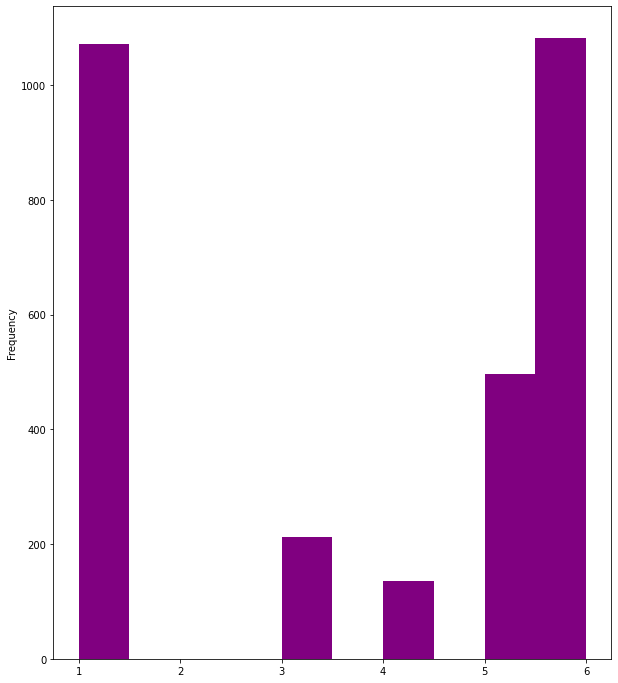

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots (figsize = (10,12))
X.ConstellationType.plot (kind = "hist", ax = ax,color="purple")